## Preprocessing

In [41]:
from src.parsing import location_data

df = location_data('Dataset/location-history.json')
df.head(10)

,start_time,end_time,type,start_location,end_location,distance_m,transport_type,transport_prob,location,semantic_type,place_id,visit_prob,hierarchy_level,duration_min
0,2018-08-17 00:15:17.977000+00:00,2018-08-17 00:16:17.977000+00:00,visit,None,None,NaN,None,None,"30.088448,31.328559",Unknown,ChIJoe_NoCE-WBQRsEmlIzDFxQM,1.000000,0,1.000000
1,2018-11-20 12:47:10.104000+00:00,2018-11-20 13:54:23.963000+00:00,activity,"29.271627,47.904906","29.334846,48.055251",20822.0,in passenger vehicle,0.000000,None,None,None,None,None,67.230983
2,2018-11-20 13:54:23.963000+00:00,2018-11-20 17:00:36.416000+00:00,visit,None,None,NaN,None,None,"29.334686,48.054773",Unknown,ChIJh_W2u6Sdzz8RHtXYnqBrFfo,0.230776,0,186.207550
3,2018-11-20 17:00:36.416000+00:00,2018-11-20 17:17:15.655000+00:00,activity,"29.334686,48.054773","29.390419,47.998450",10206.0,in passenger vehicle,0.000000,None,None,None,None,None,16.653983
4,2018-11-20 17:17:15.655000+00:00,2018-11-20 18:22:19.472000+00:00,visit,None,None,NaN,None,None,"29.390419,47.998450",Unknown,ChIJq0lJAoOEzz8RyQGu9GYk8cc,0.723125,0,65.063617
5,2018-11-20 18:22:19.472000+00:00,2018-11-20 20:14:44.408000+00:00,activity,"29.390646,47.997501","29.334852,48.055152",8604.0,in passenger vehicle,0.000000,None,None,None,None,None,112.415600
6,2018-11-20 20:14:44.408000+00:00,2018-11-21 05:04:14.108000+00:00,visit,None,None,NaN,None,None,"29.335293,48.054646",Unknown,ChIJQWqZlqSdzz8R2vrJUL3Goe4,0.290125,0,529.495000
7,2018-11-21 05:04:14.108000+00:00,2018-11-21 07:46:46.263000+00:00,activity,"29.335078,48.053830","29.269389,48.014000",30440.0,in passenger vehicle,0.000000,None,None,None,None,None,162.535917
8,2018-11-21 07:46:46.263000+00:00,2018-11-21 09:18:39.377000+00:00,visit,None,None,NaN,None,None,"29.269389,48.014000",Unknown,ChIJ8exnDceezz8RnRBm-9NyJ4g,0.526892,0,91.885233
9,2018-11-21 09:18:39.377000+00:00,2018-11-21 14:15:31.330000+00:00,activity,"29.269989,48.013778","29.265151,47.963258",18176.0,in passenger vehicle,0.000000,None,None,None,None,None,296.865883


In [42]:
df_raw = location_data("Dataset/location-history.json")

# Filter only activity entries
df_activities = df_raw[df_raw["type"] == "activity"].copy()

# Count raw transport types
df_activities["transport_type"].value_counts()


transport_type
in passenger vehicle    2905
walking                  272
unknown                   21
in subway                 16
cycling                   15
flying                    14
in bus                     9
in train                   4
in tram                    2
Name: count, dtype: int64

In [43]:
import pandas as pd

df = df[df["type"] == "activity"].copy()

# Dropping unnecessary columns
df = df.drop(columns=["location", "semantic_type", "place_id", "visit_prob", "hierarchy_level"])

# Convert transport_prob to numeric
df["transport_prob"] = pd.to_numeric(df["transport_prob"], errors="coerce")

# Drop NaN
df = df.dropna(subset=["distance_m", "duration_min", "transport_type", "transport_prob"])

# Filter by confidence
#df = df[df["transport_prob"] > 0.5]

df["transport_type"] = df["transport_type"].replace({
    "in bus": "public transport",
    "in subway": "public transport",
    "in train": "public transport",
    "in tram": "public transport",
    "flying": "other",
    "unknown": "other"
})

#Dropping other from transport_type
df = df[df["transport_type"] != "other"]
df.head(10)


,start_time,end_time,type,start_location,end_location,distance_m,transport_type,transport_prob,duration_min
1,2018-11-20 12:47:10.104000+00:00,2018-11-20 13:54:23.963000+00:00,activity,"29.271627,47.904906","29.334846,48.055251",20822.0,in passenger vehicle,0.0,67.230983
3,2018-11-20 17:00:36.416000+00:00,2018-11-20 17:17:15.655000+00:00,activity,"29.334686,48.054773","29.390419,47.998450",10206.0,in passenger vehicle,0.0,16.653983
5,2018-11-20 18:22:19.472000+00:00,2018-11-20 20:14:44.408000+00:00,activity,"29.390646,47.997501","29.334852,48.055152",8604.0,in passenger vehicle,0.0,112.415600
7,2018-11-21 05:04:14.108000+00:00,2018-11-21 07:46:46.263000+00:00,activity,"29.335078,48.053830","29.269389,48.014000",30440.0,in passenger vehicle,0.0,162.535917
9,2018-11-21 09:18:39.377000+00:00,2018-11-21 14:15:31.330000+00:00,activity,"29.269989,48.013778","29.265151,47.963258",18176.0,in passenger vehicle,0.0,296.865883
11,2018-11-21 14:46:12.078000+00:00,2018-11-21 15:29:27.295000+00:00,activity,"29.265620,47.962933","29.334849,48.055245",18741.0,in passenger vehicle,0.0,43.253617
13,2018-11-22 06:38:57.421000+00:00,2018-11-22 08:25:35.852000+00:00,activity,"29.334849,48.055245","29.342436,48.065556",3995.0,in passenger vehicle,0.0,106.640517
15,2018-11-22 10:31:47.133000+00:00,2018-11-22 11:18:47.740000+00:00,activity,"29.342902,48.065216","29.341743,48.064374",2135.0,walking,0.0,47.010117
17,2018-11-22 12:48:51.402000+00:00,2018-11-22 13:17:30.327000+00:00,activity,"29.342277,48.063301","29.334915,48.055016",1185.0,in passenger vehicle,0.0,28.648750
19,2018-11-23 06:49:38.383000+00:00,2018-11-24 06:07:31.097000+00:00,activity,"29.336180,48.053681","29.310038,48.019434",5654.0,in passenger vehicle,0.0,1397.878567


In [44]:
df["transport_type"].value_counts()

transport_type
in passenger vehicle    2905
walking                  272
public transport          31
cycling                   15
Name: count, dtype: int64

## Feature Engineering

In [45]:
# Hour of day
df["hour"] = df["start_time"].dt.hour

# Day of week (e.g., Monday, Tuesday)
df["day_of_week"] = df["start_time"].dt.day_name()

# Speed (km/h)
df["speed_kmph"] = (df["distance_m"] / 1000) / (df["duration_min"] / 60)

# Drop any rows with invalid speed
# df = df[df["speed_kmph"] < 200]  # remove outliers

# 0 Duration outliers
#df = df[df["duration_min"] > 0]

df["transport_type"].value_counts()


transport_type
in passenger vehicle    2905
walking                  272
public transport          31
cycling                   15
Name: count, dtype: int64

In [46]:
df["start_lat"] = pd.to_numeric(df["start_location"].str.split(",").str[0], errors="coerce")
df["start_lon"] = pd.to_numeric(df["start_location"].str.split(",").str[1], errors="coerce")

df_egypt = df[
    (df["start_lat"] > 22) & (df["start_lat"] < 32) &
    (df["start_lon"] > 25) & (df["start_lon"] < 36)
]


# Classifiers

## Random Forest Classifier

                      precision    recall  f1-score   support

             cycling       0.00      0.00      0.00         3
in passenger vehicle       0.81      0.87      0.84        62
    public transport       0.00      0.00      0.00         6
             walking       0.82      0.89      0.85        53

            accuracy                           0.81       124
           macro avg       0.41      0.44      0.42       124
        weighted avg       0.76      0.81      0.78       124



/home/phillip/Machine-Learning/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/phillip/Machine-Learning/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/phillip/Machine-Learning/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metri

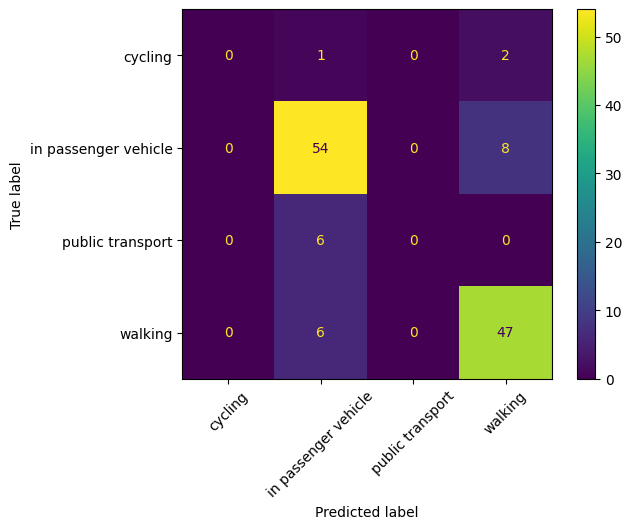

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.utils import resample

# Downsample dominant class
df_major = df[df["transport_type"] == "in passenger vehicle"]
df_minor = df[df["transport_type"] != "in passenger vehicle"]
df_major_downsampled = resample(df_major, replace=False, n_samples=300, random_state=42)
df_balanced = pd.concat([df_major_downsampled, df_minor])

# Feature matrix and labels from the balanced dataset
X = df_balanced[["hour", "duration_min", "speed_kmph"]]
y = df_balanced["transport_type"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42, class_weight="balanced")
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, xticks_rotation=45)

## Logistic Regression

/home/phillip/Machine-Learning/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/home/phillip/Machine-Learning/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/phillip/Machine-Learning/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

                      precision    recall  f1-score   support

             cycling       0.00      0.00      0.00         3
in passenger vehicle       0.92      0.76      0.83        62
    public transport       0.00      0.00      0.00         6
             walking       0.75      0.96      0.84        53

            accuracy                           0.79       124
           macro avg       0.42      0.43      0.42       124
        weighted avg       0.78      0.79      0.78       124



/home/phillip/Machine-Learning/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


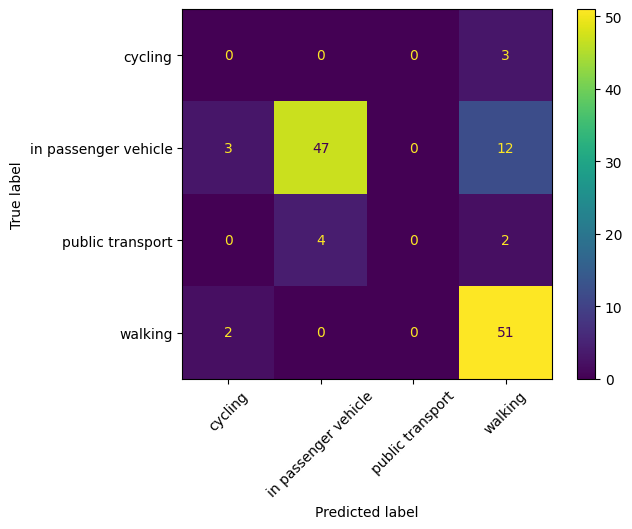

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train logistic regression
log_model = LogisticRegression(max_iter=1000, class_weight="balanced", solver='liblinear')
log_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = log_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(log_model, X_test, y_test, xticks_rotation=45)


## XGBoost

/home/phillip/Machine-Learning/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [01:33:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                      precision    recall  f1-score   support

             cycling       0.00      0.00      0.00         3
in passenger vehicle       0.82      0.76      0.79        62
    public transport       0.17      0.17      0.17         6
             walking       0.80      0.91      0.85        53

            accuracy                           0.77       124
           macro avg       0.45      0.46      0.45       124
        weighted avg       0.76      0.77      0.77       124



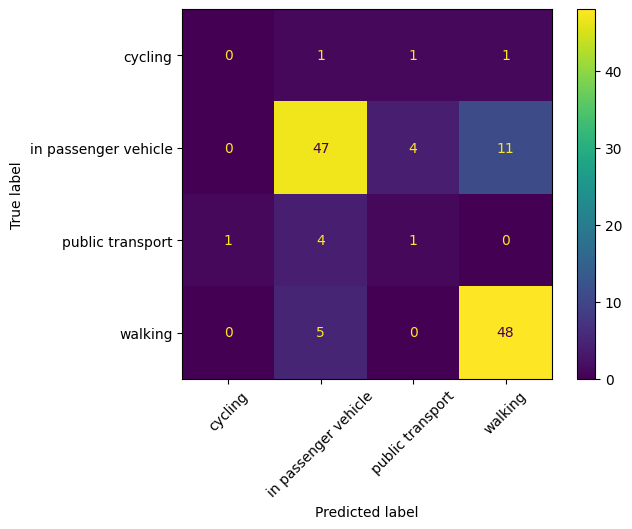

In [49]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Encode string labels to integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train XGBoost
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Predict
y_pred = xgb_model.predict(X_test)

# Decode predictions back to strings for report
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred)

# Evaluation
print(classification_report(y_test_labels, y_pred_labels))
ConfusionMatrixDisplay.from_predictions(y_test_labels, y_pred_labels, xticks_rotation=45)


## Line of Best Fit

Linear Equation: speed_kmph = 24.41 + -0.018 * duration_min
R-squared: 0.0191


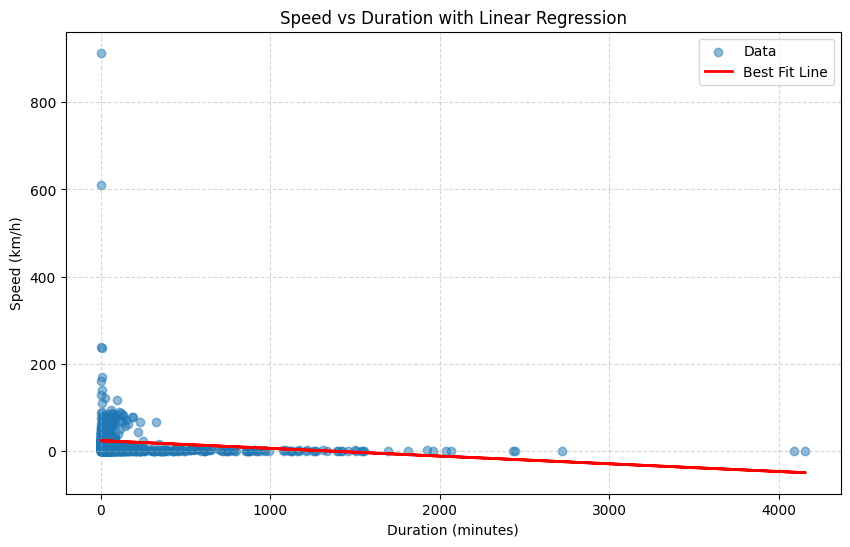

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# X = duration (minutes), y = speed (km/h)
X = df[["duration_min"]]  # 2D DataFrame
y = df["speed_kmph"]

# Fit the linear model
model = LinearRegression().fit(X, y)

# Print the equation
print(f"Linear Equation: speed_kmph = {model.intercept_:.2f} + {model.coef_[0]:.3f} * duration_min")

# R² score
r2 = model.score(X, y)
print(f"R-squared: {r2:.4f}")

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label="Data")
plt.plot(X, model.predict(X), color='red', linewidth=2, label="Best Fit Line")
plt.xlabel("Duration (minutes)")
plt.ylabel("Speed (km/h)")
plt.title("Speed vs Duration with Linear Regression")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.show()


Linear Equation: speed_kmph = 24.42 + -0.037 * duration_min
R-squared: 0.0046


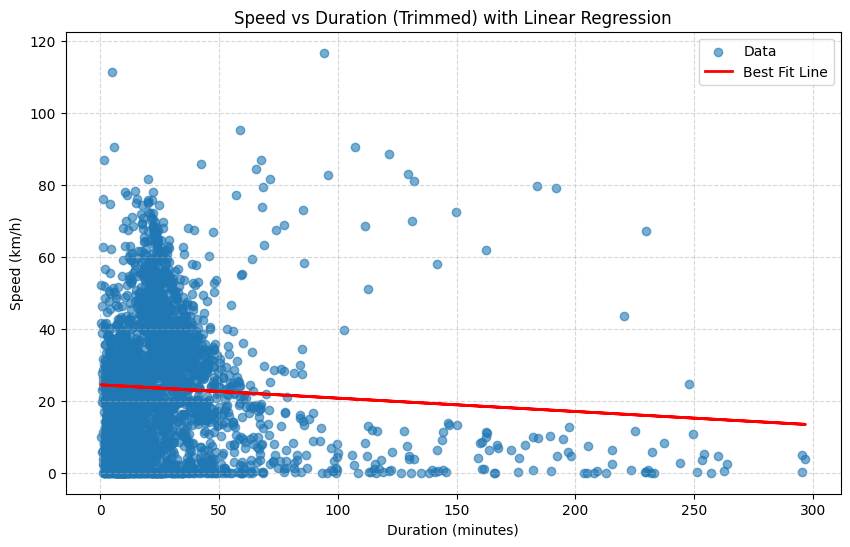

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Filter out extreme values for better visual fit
df_trimmed = df[(df["duration_min"] < 300) & (df["speed_kmph"] < 120)]

# Prepare features
X = df_trimmed[["duration_min"]]
y = df_trimmed["speed_kmph"]

# Fit model
model = LinearRegression().fit(X, y)

# Print regression details
print(f"Linear Equation: speed_kmph = {model.intercept_:.2f} + {model.coef_[0]:.3f} * duration_min")
print(f"R-squared: {model.score(X, y):.4f}")

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, label='Data')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Best Fit Line')
plt.xlabel("Duration (minutes)")
plt.ylabel("Speed (km/h)")
plt.title("Speed vs Duration (Trimmed) with Linear Regression")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()
